# Projeto - Culinária
## Explorando os dados

In [99]:
## Importando libs

import pandas as pd 
import numpy as np 
import re

import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

pd.set_option("max_colwidth", 1000000)
pd.options.display.float_format = "{:,.2f}".format
plt.style.use("classic")

In [100]:
## Importando dataset

recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")
print("Tudo pronto")

Tudo pronto


Vamos olhar um pouco o dataset

In [101]:
## Olhando as primeiras linhas

recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [102]:
## O tamanho total do dataframe

recipes.shape

(57691, 384)

In [103]:
## Descobrindo se arroz, wasabi e\ ou soja aparecem em algum dos ingrdientes de alguma forma

ingredients = list(recipes.columns.values)

print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(rice).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(wasabi).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(soy).*")).search(ingredient)] if match])

['brown_rice', 'licorice', 'rice']
['wasabi']
['soy_sauce', 'soybean', 'soybean_oil']


In [104]:
## Vamos alterar o nome da primeira coluna de "country" para "cuisine"
## que faz mais sentido para nosso estudo

column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57687,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57688,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57689,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


Vamos ajustar algumas coisas que vão facilitar na análise e no treinamento do modelo mais para frente

In [105]:
## Transformando todas as letras em minusculas

recipes["cuisine"] = recipes["cuisine"].str.lower()

In [106]:
## Vamos observar se não temos culinárias "repetidas", mas com nomes diferentes, algumas semelhantes que podemos juntar e 
## mais alguma coisa que pode surgir

recipes['cuisine'].value_counts()

american        40150
italian          1789
mexico           1768
italy            1461
asian            1193
                ...  
indonesia          12
belgium            11
east-african       11
israel              9
bangladesh          4
Name: cuisine, Length: 64, dtype: int64

## Lembrete de revisão:
southern_soulfood, southwestern, western

In [107]:
## Verificamos alguns ajustes que vão facilitar nossa análise e o modelo logo menos.
## Então vamos padronizar os nomes das culinárias o máximo possível

recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "south_america", "cuisine"] = "south_american"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "bangladesh", "cuisine"] = "bangladeshi"
recipes.loc[recipes["cuisine"] == "cajun_creole", "cuisine"] = "louisiana_creole"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "israeli"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistanese"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"

recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57687,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57688,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57689,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [108]:
## Achei estranho alguns nomes de culinárias, vamos ver se são relevantes em número

print('O southern_soulfood tem ', recipes[(recipes['cuisine']=='southern_soulfood')].shape, 'pratos no dataset')
print('O southwestern tem ', recipes[(recipes['cuisine']=='southwestern')].shape, 'pratos no dataset')
print('O western tem ', recipes[(recipes['cuisine']=='western')].shape, 'pratos no dataset')

O southern_soulfood tem  (346, 384) pratos no dataset
O southwestern tem  (108, 384) pratos no dataset
O western tem  (450, 384) pratos no dataset


Encontrei algumas no Google e tomei a decisão de manter os dados no dataset

In [109]:
## Vamos facilitar o processamento dos dados por parte do modelo de ml alterando os "yes" por 1 e os "no" por 0

recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

# Algumas perguntas a serem respondidas:
## 1) Existem valores nulos? Se sim, o que faremos?
## 2) Quais os ingredientes que mais aparecem nas receitas?
## 3) Quais menos aparecem?
## 4) A distribuição dos dados não é muito boa (muitas culinárias americanas e quase nenhuma bangladeshiana por exemplo), então precisamos nos preocupar?

In [12]:
## 1) Verificando valores nulos pelo df

recipes.isnull().values.any()

False

O arquivo está bem limpo, então não vamos precisar preencher ou excluir dados dele. Fica pra próxima!

In [13]:

## 2) A ideia agora é identificar os ingredientes que mais e menos aparecem nos pratos.
## Como sempre que um ingrediente aparece, temos o número 1, se somarmos o valor da coluna, 
## teremos a quantidade de vezes que ele aparece nos pratos.
## Vamos começar armazenando a soma de cada coluna em uma lista.


list1 = []
i = 1

print(list1)

while i<384:
    list1.append(recipes.iloc[:,i].sum())
    i +=1
print(list1)

[]
[2329, 1, 224, 87, 2433, 37, 626, 11, 13, 391, 461, 662, 2172, 9, 3, 992, 267, 23, 3845, 1486, 2003, 1, 4946, 850, 10, 308, 233, 6006, 7, 183, 85, 495, 11, 30, 9893, 8, 26, 45, 170, 4, 396, 467, 50, 156, 399, 116, 4596, 931, 347, 92, 90, 20814, 1637, 1035, 17, 35, 12, 7770, 233, 375, 3, 7, 3717, 210, 22, 71, 333, 28, 8303, 3634, 1008, 204, 3, 100, 27, 3029, 3286, 1085, 34, 52, 5483, 3620, 52, 406, 157, 166, 1337, 1136, 2493, 5639, 171, 4, 476, 10, 4807, 1822, 17, 181, 720, 67, 12, 9, 1679, 4836, 225, 163, 348, 574, 920, 10194, 2843, 1908, 3321, 315, 242, 378, 1111, 1, 20, 21114, 319, 5, 1, 115, 106, 913, 940, 623, 139, 2113, 32, 37, 481, 51, 9, 17465, 1418, 1, 68, 4396, 260, 346, 8, 825, 121, 2590, 35, 45, 13, 31, 1302, 288, 10, 3, 2558, 3, 396, 10, 1, 13, 8, 2, 33, 1, 100, 63, 179, 442, 109, 6, 33, 488, 3062, 2, 62, 9, 426, 3066, 5099, 729, 221, 251, 1211, 21, 1, 149, 1165, 1622, 108, 9, 12, 42, 131, 2, 142, 103, 3117, 118, 44, 38, 279, 15, 420, 478, 528, 1, 57, 991, 163, 12925, 96

In [14]:
## Armazenando o índice da lista que tem maior valor, podemos identificar o índice da coluna para saber o nome do ingrediente

coluna1 = list1.index(max(list1))

print(recipes.iloc[0,[coluna1+1]]) # Usamos o índice + 1, pois a primeira coluna do df é a coluna "cuisine"
print()
print(max(list1))

egg    0
Name: 0, dtype: object

21114


In [15]:
## Queremos construir um gráfico que possamos ver os "maiores" e "menores" itens.
## Vamos copiar o df para termos os nomes das colunas e podermos armazenar as quantidades em baixo da respectiva coluna.

ingredients_sum = recipes.copy()
list2 = []

i = 0 
for i in range(57691):
    list2.append(i)
    
ingredients_sum.drop(list2, axis=0, inplace=True)
ingredients_sum.drop('cuisine', axis=1, inplace=True)

ingredients_sum

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini


In [16]:
## Armazenando os valores

ingredients_sum.loc[1] = list1
ingredients_sum

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
1,2329,1,224,87,2433,37,626,11,13,391,...,149,372,2212,734,1026,33,86,3402,1057,1107


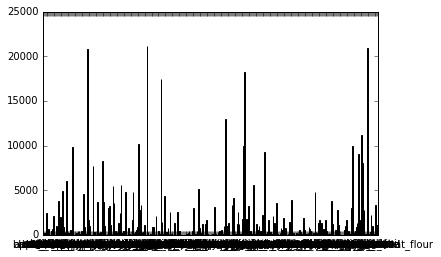

In [17]:
## Vamos utilizar o dicionário para criarmos o gráfico

dici = dict(ingredients_sum.iloc[0,:]) 

plt.bar(dici.keys(), dici.values())
plt.show()

Bom, o gráfico ficou ilegível pela quantidade de ingredientes, então não nos ajuda muito...
Vamos tentar uma abordagem diferente:

In [18]:
## Organizando o dicionário por valores

i = 0

for i in sorted(dici, key = dici.get):
    print(i, dici[i])


angelica 1
beech 1
durian 1
emmental_cheese 1
geranium 1
jamaican_rum 1
kaffir_lime 1
lilac_flower_oil 1
mate 1
muscat_grape 1
pelargonium 1
roasted_hazelnut 1
roasted_nut 1
roasted_pecan 1
strawberry_jam 1
sturgeon_caviar 1
jasmine_tea 2
laurel 2
long_pepper 2
pimenta 2
raw_beef 2
red_algae 2
sheep_cheese 2
soybean_oil 2
strawberry_juice 2
balm 3
carnation 3
chamomile 3
holy_basil 3
hop 3
mutton 3
rapeseed 3
roasted_almond 3
blackberry_brandy 4
citrus_peel 4
sea_algae 4
elderberry 5
pork_liver 5
kohlrabi 6
smoked_fish 6
spearmint 6
violet 6
bergamot 7
carob 7
black_raspberry 8
grape_brandy 8
jasmine 8
sunflower_oil 8
baked_potato 9
condiment 9
gardenia 9
leaf 9
lingonberry 9
ouzo 9
peppermint_oil 9
beef_liver 10
clove 10
herring 10
huckleberry 10
armagnac 11
black_currant 11
pear_brandy 11
camembert_cheese 12
concord_grape 12
litchi 12
artemisia 13
guava 13
japanese_plum 13
sumac 14
mandarin_peel 15
roasted_meat 15
salmon_roe 15
cabernet_sauvignon_wine 17
coconut_oil 17
orange_flower 

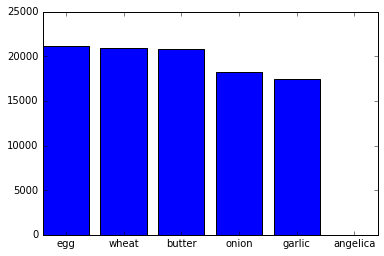

In [19]:
## 2) e 3)
## Respondendo ambas as perguntas:
## Criamos os valores manualmente, pois não precisamos automatizar esta análise.


dicimax = {'egg':21114, 'wheat':20896, 'butter':20814, 'onion':18205, 'garlic':17465}
dicimin = {'angelica':1}

dici_onario = {**dicimax, **dicimin}
plt.bar(dici_onario.keys(), dici_onario.values())
plt.show()

Temos os 5 ingredientes que mais aparecem no df e dentre os que menos aparecem, angelica e outros só estão presentes em 1 prato.

In [21]:
## 5) Quais culinárias mais aparecem?

recipes.cuisine.value_counts(normalize=True).sort_values(ascending=False)

american                  0.70
italian                   0.06
mexican                   0.04
french                    0.02
asian                     0.02
east_asian                0.02
korean                    0.01
canadian                  0.01
indian                    0.01
western                   0.01
chinese                   0.01
uk-and-irish              0.01
southern_soulfood         0.01
jewish                    0.01
japanese                  0.01
spanish_portuguese        0.01
german                    0.01
thai                      0.01
mediterranean             0.01
scandinavian              0.00
middleeastern             0.00
central_southamerican     0.00
eastern-europe            0.00
greek                     0.00
english_scottish          0.00
caribbean                 0.00
louisiana_creole          0.00
easterneuropean_russian   0.00
moroccan                  0.00
african                   0.00
southwestern              0.00
south-america             0.00
vietname

O dataframe é bem desbalanceado, muito peso em culinárias americanas e pouquíssimo de outras, o que provavelmente vai fazer 
com que nosso modelo não seja tão útil para replicação no mundo real por enquanto.

## Vamos começar o modelo em si

In [22]:
## Relembrando

recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
## Criamos as features e target

features = list(recipes.columns)
del(features[0])
target = 'cuisine'

In [48]:
## Vamos usar o módulo do Scikit-Learn para dividir nosso df em teste e validação

X = recipes[features]
y = recipes[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [49]:
## Efetivamente usando os dados para treinar o modelo

recipes_model = RandomForestClassifier()
recipes_model.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
## Agora vamos prever as culinárias para nossas features de validação

y_pred = recipes_model.predict(X_val)
y_pred

array(['chinese', 'american', 'american', ..., 'american', 'american',
       'eastern-europe'], dtype=object)

In [78]:
## Medindo a acurácia com outro módulo do Scikit-Learn

from sklearn.metrics import accuracy_score

print("Acurácia: " + str(accuracy_score(y_val, y_pred)))

Acurácia: 0.7078229720360527


Como previamos, o modelo não representa a verdade e não temos muito o que fazer para melhorá-lo com tamanha disparidade nos dados

In [54]:
## Outra maneira de vermos sua efetividade

print(np.mean(y_val == y_pred))

0.7078229720360527


Temos que em 70% das vezes, o modelo acertou, porém como 70% do nosso df é só de 1 culinária, se o modelo literalmente só chutasse "american" para todas as linhas, naturalmente teríamos 70% de acerto.

In [29]:
## Vamos tentar usar o método KFold so Scikit-Learn para misturar os dados e tentar aumentar um pouco a assertividade 
## Primeiramente vamos entender como funciona o KFold

from sklearn.model_selection import KFold

X_falso = np.arange(10)

kf = KFold(3, shuffle=True, random_state=0)
for linhas_treino, linhas_valid in kf.split(X_falso):
    print("Treino:", linhas_treino)
    print("Valid:", linhas_valid)
    print()


Treino: [0 1 3 5 6 7]
Valid: [2 4 8 9]

Treino: [0 2 3 4 5 8 9]
Valid: [1 6 7]

Treino: [1 2 4 6 7 8 9]
Valid: [0 3 5]



O KFold seleciona aleatorimante linhas para treino e validação. A simulação a cima mostra como o método dividiria um df com 10 linhas por 3x, a fim de encontrarmos a melhor combinação das linhas e obter uma melhor acurácia

In [31]:
## Agora vamos fazer isso para nosso df de verdade
## Essa célula vai demorar um pouco para rodar pelo tanto de tarefas executadas

resultados = []
for rep in range(10):
    print("Rep:", rep)
    kf = KFold(2, shuffle=True, random_state=rep)
    
    for linhas_treino, linhas_valid in kf.split(X):
        print("Treino:", linhas_treino.shape[0])
        print("Valid:", linhas_valid.shape[0])

        X_train, X_val = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_train, y_val = y.iloc[linhas_treino], y.iloc[linhas_valid]

        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
        modelo.fit(X_train, y_train)

        p = modelo.predict(X_val)

        acc = np.mean(y_val == p)
        resultados.append(acc)
        print("Acc:", acc)
        print()

Rep: 0
Treino: 28845
Valid: 28846
Acc: 0.7151424807598974

Treino: 28846
Valid: 28845
Acc: 0.7142312359161033

Rep: 1
Treino: 28845
Valid: 28846
Acc: 0.7135824724398531

Treino: 28846
Valid: 28845
Acc: 0.7146125845033802

Rep: 2
Treino: 28845
Valid: 28846
Acc: 0.7122997989322609

Treino: 28846
Valid: 28845
Acc: 0.7156179580516554

Rep: 3
Treino: 28845
Valid: 28846
Acc: 0.7150038133536712

Treino: 28846
Valid: 28845
Acc: 0.7118044721788872

Rep: 4
Treino: 28845
Valid: 28846
Acc: 0.7110171254246689

Treino: 28846
Valid: 28845
Acc: 0.7165193274397642

Rep: 5
Treino: 28845
Valid: 28846
Acc: 0.7124384663384872

Treino: 28846
Valid: 28845
Acc: 0.7160686427457098

Rep: 6
Treino: 28845
Valid: 28846
Acc: 0.713201137072731

Treino: 28846
Valid: 28845
Acc: 0.7138152192754377

Rep: 7
Treino: 28845
Valid: 28846
Acc: 0.7146224779865492

Treino: 28846
Valid: 28845
Acc: 0.7144739122898249

Rep: 8
Treino: 28845
Valid: 28846
Acc: 0.712750468002496

Treino: 28846
Valid: 28845
Acc: 0.714993933090657

Rep:

Não melhoramos muito, como esperado pelo df. Mas este é o fim do projeto, com arquivo devidamente explorado, limpo, modelo criado e proposta de melhoria. 

In [32]:
## Por fim vamos verificar a importância de cada linha para o modelo

feature_imp = pd.Series(modelo.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp

cayenne            0.02
olive_oil          0.02
egg                0.02
butter             0.02
vegetable_oil      0.02
                   ... 
jamaican_rum       0.00
strawberry_juice   0.00
kaffir_lime        0.00
pimenta            0.00
laurel             0.00
Length: 383, dtype: float64

## Undersampling

In [56]:
maj_class_len = len(recipes[recipes[target] == 'american'])
min_class_len = len(recipes[recipes[target] != 'american'])

maj_class_len, min_class_len

(40150, 17541)

In [57]:
maj_class_index = recipes[recipes[target] == 'american'].index
min_class_index = recipes[recipes[target] != 'american'].index

In [58]:
random_maj_index = np.random.choice(maj_class_index, min_class_len, replace=False)

print(len(random_maj_index))

17541


In [59]:
under_sample_index = np.concatenate([min_class_index, random_maj_index])
under_sample = recipes.loc[under_sample_index]

<AxesSubplot:xlabel='cuisine', ylabel='count'>

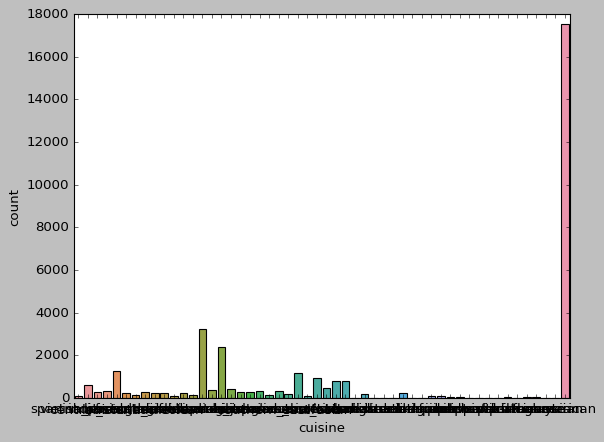

In [60]:
sns.countplot(x=target, data=under_sample)

In [61]:
maj_class_len = len(recipes[recipes[target] == 'american'])
min_class_len = len(recipes[recipes[target] == 'italian'])

maj_class_len, min_class_len

(40150, 3250)

In [72]:
maj_class_index = recipes[recipes[target] == 'american'].index
min_class_index = recipes[recipes[target] == 'italian'].index

min_classes_index = recipes[recipes[target] != 'american'].index

In [71]:
random_maj_index = np.random.choice(maj_class_index, min_class_len, replace=False)

print(len(random_maj_index))

3250


In [73]:
under_sample_index = np.concatenate([min_classes_index, random_maj_index])
under_sample = recipes.loc[under_sample_index]

<AxesSubplot:xlabel='cuisine', ylabel='count'>

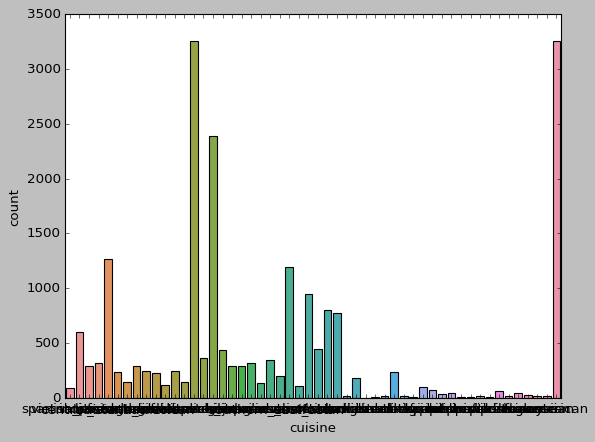

In [74]:
sns.countplot(x=target, data=under_sample)

In [75]:
X = under_sample.loc[:, recipes.columns!=target]
y = under_sample.loc[:, recipes.columns==target]

X_treino, X_valid, y_treino, y_valid = train_test_split(X,y, test_size=0.3, random_state=1)

In [76]:
under_sample_model = RandomForestClassifier().fit(X_treino, y_treino)
y_p = under_sample_model.predict(X_valid)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12604\129303853.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  under_sample_model = RandomForestClassifier().fit(X_treino, y_treino)


In [79]:
print("Acurácia: " + str(accuracy_score(y_valid, y_p)))

Acurácia: 0.4158384097467137


### Vamos tentar diminuir a variabilidade das culinárias

In [95]:
recipes_counts = recipes.cuisine.value_counts().sort_values(ascending=False)
recipes_counts

american                   40150
italian                     3250
mexican                     2390
french                      1264
asian                       1193
east_asian                   951
korean                       799
canadian                     774
indian                       598
western                      450
chinese                      442
uk-and-irish                 368
southern_soulfood            346
jewish                       320
japanese                     320
spanish_portuguese           291
german                       289
thai                         289
mediterranean                289
scandinavian                 250
middleeastern                248
central_southamerican        241
eastern-europe               235
greek                        225
english_scottish             204
caribbean                    183
louisiana_creole             146
easterneuropean_russian      146
moroccan                     137
african                      115
southweste

In [110]:
cuisines_index = recipes_counts >= 100

cuisines_to_drop = list(np.array(recipes_counts.index.values)[np.array(cuisines_index)])
recipes = recipes.loc[recipes['cuisine'].isin(cuisines_to_drop)]

recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='cuisine', ylabel='count'>

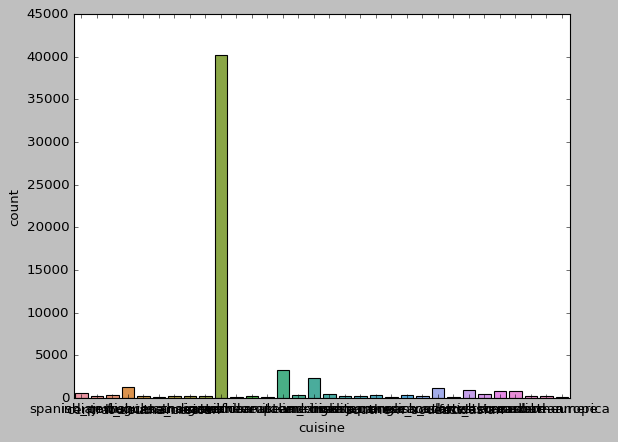

In [111]:
sns.countplot(x=target, data=recipes)

In [112]:
maj_class_len = len(recipes[recipes[target] == 'american'])
min_class_len = len(recipes[recipes[target] == 'italian'])

maj_class_len, min_class_len

(40150, 3250)

In [113]:
maj_class_index = recipes[recipes[target] == 'american'].index
min_class_index = recipes[recipes[target] == 'italian'].index

min_classes_index = recipes[recipes[target] != 'american'].index

In [114]:
random_maj_index = np.random.choice(maj_class_index, min_class_len, replace=False)

print(len(random_maj_index))

3250


In [115]:
under_sample_index = np.concatenate([min_classes_index, random_maj_index])
under_sample = recipes.loc[under_sample_index]

<AxesSubplot:xlabel='cuisine', ylabel='count'>

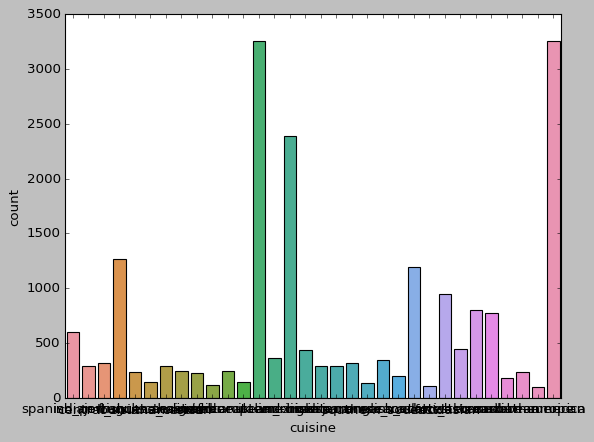

In [116]:
sns.countplot(x=target, data=under_sample)

In [135]:
X = under_sample.loc[:, recipes.columns!=target]
y = under_sample.loc[:, recipes.columns==target]

X_treino, X_valid, y_treino, y_valid = train_test_split(X,y, random_state=1)

In [136]:
under_sample_model = RandomForestClassifier().fit(X_treino, y_treino)
y_p = under_sample_model.predict(X_valid)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12604\129303853.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  under_sample_model = RandomForestClassifier().fit(X_treino, y_treino)


In [137]:
print("Acurácia: " + str(accuracy_score(y_valid, y_p)))

Acurácia: 0.4319351009101702


In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix

In [151]:
under_sample_model = LogisticRegression(random_state=1, max_iter=1000)
under_sample_model.fit(X_treino, y_treino)

y_p = under_sample_model.predict(X_valid)

print("Acurácia: " + str(accuracy_score(y_valid, y_p)))

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.4946571682991986


In [152]:
print(classification_report(y_valid, y_p))

                         precision    recall  f1-score   support

                african       0.22      0.06      0.09        36
               american       0.40      0.64      0.49      1113
                  asian       0.52      0.49      0.50       430
               canadian       0.23      0.02      0.04       262
              caribbean       0.38      0.20      0.26        55
  central_southamerican       0.29      0.02      0.04        97
                chinese       0.30      0.25      0.27       149
             east_asian       0.40      0.43      0.41       323
         eastern-europe       0.40      0.17      0.24        81
easterneuropean_russian       0.40      0.07      0.12        55
       english_scottish       0.25      0.05      0.09        74
                 french       0.41      0.39      0.40       408
                 german       0.40      0.23      0.29        97
                  greek       0.43      0.34      0.38        68
                 indian 